This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2021-11-18 19:33:21--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-18 19:33:22--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaf69b7da9d5a68e94769e68bf6.dl.dropboxusercontent.com/cd/0/inline/BaNSAYz6ElLxxV0Y_MNLvvROAV2FmU042aWGEywsQbOhl9azosI6iayMtSo59ujTI13Fbj67pMpScK0CvCAkOzB75vTrew6ucyJ6tkd9tWAARHW7cKCe5_J-eEaG3PHv0PiJEHPj1LH9CKME585pkGRg/file# [following]
--2021-11-18 19:33:22--  https://ucaf69b7da9d5a68e94769e68bf6.dl.dropboxusercontent.com/cd/0/inline/BaNSAYz6ElLxxV0Y_MNLvvROAV2FmU042aWGEywsQbOhl9azosI6iayMtSo59ujTI13Fbj67pMpScK0CvCAkOzB75vTrew6ucyJ6tkd9tWAARHW7cKCe5_J-eEaG3PHv0PiJEHPj1LH9CKM

In [3]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [4]:
file_name = "./data/data_000637.txt"

dataN = pd.read_csv(file_name,nrows = 1000000)
dataN

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
999995,1,0,62,3869209011,2560,29
999996,1,0,51,3869209011,2561,12
999997,1,0,61,3869209011,2562,2
999998,1,0,50,3869209011,2563,4


In [5]:
file_name = "./data/data_000637.txt"
data = pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [6]:
#Estimating x -> è il valore di BX per cui orbit aumenta di uno

x = np.max(data["BX_COUNTER"]) + 1

print("The x value is ", x)




The x value is  3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [7]:
time_i = data.loc[data.index[0], 'TDC_MEAS']*25/30 + data.loc[data.index[0], 'BX_COUNTER']*25 + data.loc[data.index[0], 'ORBIT_CNT']*x*25

time_f = data.loc[data.index[-1], 'TDC_MEAS']*25/30 + data.loc[data.index[-1], 'BX_COUNTER']*25 + data.loc[data.index[-1], 'ORBIT_CNT']*x*25

#performing the time of acquisition as the difference between time of last data and first data acquired
time = time_f - time_i
print("time for taking data:",time," ns")

time_s = time * 0.000000001
print("time for tacking data:", time_s, "s")

time_m = time_s / 60
print("time for tacking data:", time_m, "minutes")

time_h = time_m / 60
print("time for tacking data:", time_h, "hours")


time for taking data: 980416093.3125  ns
time for tacking data: 0.9804160933125 s
time for tacking data: 0.016340268221875 minutes
time for tacking data: 0.00027233780369791664 hours


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [8]:
#non so se va bene così
data["time in ns"] = data['TDC_MEAS']*25/30 + data['BX_COUNTER']*25 + data['ORBIT_CNT']*x*25
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time in ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [9]:
#TDC_CHANNEL.count() counts the elements repeating in TDC_CHANNEL
#with .nlargest(3) I'm taking the three TDC_CHANNEL with the most counts 
noisy_ch = data.groupby('TDC_CHANNEL').TDC_CHANNEL.count().nlargest(3)
noisy_ch


TDC_CHANNEL
139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [10]:
#grupping the orbits by their value and printing how many different orbit I have 
orbits = data.groupby('ORBIT_CNT')
print("Number of non-empty orbits", len(orbits))

TDC139 = data[data['TDC_CHANNEL'] == 139].groupby('ORBIT_CNT')
print("Number of unique orbits with TDC = 139",len(TDC139))


Number of non-empty orbits 11001
Number of unique orbits with TDC = 139 10976


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

Text(0, 0.5, 'Counts')

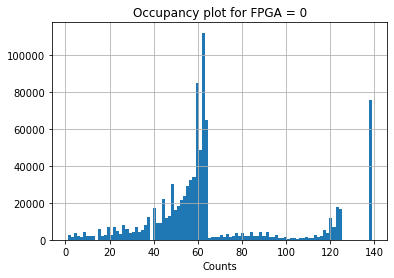

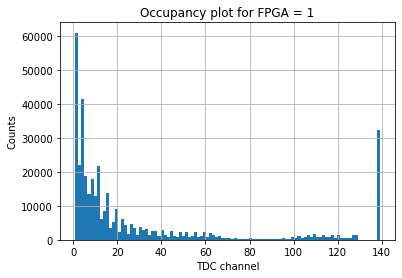

In [15]:
import pylab 

fpga_0 = data[data['FPGA'] == 0]
fpga_1 = data[data['FPGA'] == 1]

#making the first histo for FPGA=0
fpga_0.hist('TDC_CHANNEL', bins = 100,sharey=True, sharex=True)
pl.title("Occupancy plot for FPGA = 0")
pylab.xlabel('Counts')


#making the second histo for FPGA=1
fpga_1.hist('TDC_CHANNEL', bins = 100)
pl.title("Occupancy plot for FPGA = 1")
pylab.xlabel('TDC channel')
pylab.ylabel('Counts')


